# Capstone Project

Learning Objectives:

- Incorporate Illinois Reboot toolchain into a single nose-to-tail project.

## The Data Set

You work for a regional soft drink distribution center that has access to invoice data from convenience stores (`invoices.csv`), product data (`items.csv`), and customer reviews (the files in `reviews/`).

You would like to examine the data for a few features, then plug them into a recommendation engine to see if you can improve sales.

For instance, each data set should be validated and the fields (columns), basic data statistics, and any outliers should be reported.  Then further analysis can take place.

You may use Bash, Python (likely Pandas), SQL, and Git to complete this project.  I make some suggestions at various junctures to consider using particular tools, but feel free to solve the problem in any manner your team finds fitting.  _The entire team should read the entire project and discuss before making any decisions about platform._

You should produce a final report which responds to all of the **bolded** questions and includes full code and an explanation of its use.  You should not use a spreadsheet tool to complete any part of this project even if tempted—in particular, the `invoices.csv` file is too large to load in Microsoft Excel.

In general, feel free to reach out to me.  Follow the outline, but make this _your_ project.

### `items.csv`

The first data set you have available is a table of soft drink products with various data.  **Produce a brief report of the field names and associated column statistics for the table.**  Consider producing scatter plots of certain values, such as the bottle volume.

Each time you load a data table, you should carefully consider which fields should be numeric and which text.  For instance, a name is clearly text while a volume is numeric.  A product ID even if all numeric should be text, though.  (Can you think of why?)

In [ ]:
# Question: For instance, a name is clearly text while a volume is numeric.
# A product ID even if all numeric should be text, though. (Can you think of why?)

# Answer: Because ID numbers aren't going to be used for calculations so it should be stored as a string.

In [13]:
# Import pandas library and renamed it as pd
import pandas as pd

# Reading in item.csv file and indexing it by the Item_id column and saving it as a variable named data
data = pd.read_csv('data_code/item.csv', index_col='Item_id')
# Print contents of data variable
print(data)

                   Item_Description         Category  Pack  Bottle_Volume_ml  \
Item_id                                                                        
101         Kanna's Grapefruit Soda  Grapefruit Soda     6             750.0   
102          Alphonse's Fruit Punch      Fruit Punch     6             800.0   
103        Yummy Surstromming Juice              NaN     1             750.0   
107       Tamaki's Watermelon Cream       Cream Soda     6             750.0   
108         Kaori's Grapefruit Soda  Grapefruit Soda     6             750.0   
...                             ...              ...   ...               ...   
994644         Saitama's Cream Soda       Cream Soda     6             750.0   
994786   Kenji's Vanilla Cream Soda       Cream Soda     6             750.0   
994972   Tanya's Vanilla Cream Soda       Cream Soda     6             750.0   
995606          Sakura's Cream Soda       Cream Soda    12             750.0   
996026         Tetsuya's Cream Soda     

In [3]:
# Shows the names of all of the columns in the item.csv data set
print(data.columns)

Index(['Item_Description', 'Category', 'Pack', 'Bottle_Volume_ml',
       'Bottle_Cost', 'Bottle_Retail_Price'],
      dtype='object')


In [4]:
# Print data variable using the describe function to get summary statistics about data.
print(data.describe())

              Pack  Bottle_Volume_ml  Bottle_Cost  Bottle_Retail_Price
count  4166.000000       4166.000000  4166.000000          4163.000000
mean     11.260442        936.963274     3.648721             5.485763
std      11.913901       6244.415564     9.348512            14.027764
min       1.000000          0.000000     1.500000             2.450000
25%       6.000000        750.000000     2.360000             3.580000
50%      12.000000        750.000000     2.860000             4.300000
75%      12.000000        750.000000     3.610000             5.420000
max     336.000000     378000.000000   500.000000           750.000000


<AxesSubplot:xlabel='min', ylabel='max'>

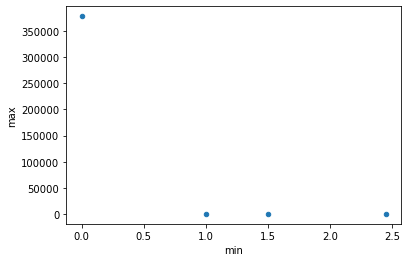

In [16]:
# Plotting
# Tried making a scatter plot based on each Item Description's bottle volume but was not successful

# Importing matplotlib library and the pyplot sub-library and renaming it as plt
%matplotlib inline
import matplotlib.pyplot as plt
# using example code from Python lesson to plot the min and max of the data.describe results
data.describe().T.plot(kind='scatter', x='min', y='max')

### `invoices.csv`

The invoice data set is quite large, too large in fact to be loaded by a conventional spreadsheet program.  Thus you will need to use Python or SQL to manage the data set.  You will not need to create additional fields (columns) in the table, but you will need to be able to merge data tables.

As before, **produce a report containing the field names and column statistics for the table.**

If using Python, Pandas should be able to readily handle the import.

If using SQL, you can [import the CSV file directly](https://www.sqlite.org/cli.html#importing_csv_files).

In [ ]:
# Were we supposed to merge the item.csv and invoices.csv together? Not sure how to join tables with Python.

In [3]:
# Import pandas library and renamed it as pd
import pandas as pd

# Reading in invoice.csv file and indexing it by the Invoice_id column and saving it as a variable named data
data = pd.read_csv('data_code/invoice.csv', index_col='Invoice_id')
# Print contents of data variable
print(data)

                       Date  Item_id  Vendor_id          Vendor_Name  \
Invoice_id                                                             
INV-00013400001  2016-08-29    35918        297        Katou Company   
INV-00013400002  2016-08-29    23828        297        Katou Company   
INV-00013400003  2016-08-29    36908        300    Katsuragi Company   
INV-00013400004  2016-08-29    34359         35          Archer Inc.   
INV-00013400005  2016-08-29    36903        300    Katsuragi Company   
...                     ...      ...        ...                  ...   
S34122500013     2016-08-25    68031        260      Inuyasha Brands   
S34122500014     2016-08-25    75212        322        Koizumi Group   
S34122500015     2016-08-25    75224        322        Koizumi Group   
S34122500016     2016-08-25    36901        300    Katsuragi Company   
S34122500017     2016-08-25    86692         85  Ayuzawa Corporation   

                 Store_id                  Store_Name          

In [7]:
# Shows the names of all of the columns in the invoice.csv data set
print(data.columns)

Index(['Date', 'Item_id', 'Vendor_id', 'Vendor_Name', 'Store_id', 'Store_Name',
       'Address', 'City_Name', 'Zip_Code', 'County_id', 'County_Name',
       'Bottles_Sold'],
      dtype='object')


In [8]:
# Print data variable using the describe function to get summary statistics about data.
print(data.describe())

             Item_id      Vendor_id       Store_id       Zip_Code  \
count  930508.000000  930508.000000  930508.000000  930508.000000   
mean    46100.761759     257.759544    3475.512880   52132.305486   
std     42887.410193     137.428615     889.217119     823.575059   
min       101.000000      10.000000    2554.000000   51101.000000   
25%     29993.000000     115.000000    2623.000000   51106.000000   
50%     41019.000000     260.000000    3447.000000   52803.000000   
75%     64571.000000     380.000000    4076.000000   52806.000000   
max    996026.000000     987.000000    9922.000000   52807.000000   

           County_id   Bottles_Sold  
count  930508.000000  930508.000000  
mean       87.817790       9.875647  
std         7.308914      22.489171  
min        82.000000       0.000000  
25%        82.000000       2.000000  
50%        82.000000       6.000000  
75%        97.000000      12.000000  
max        97.000000    2160.000000  


<AxesSubplot:xlabel='min', ylabel='max'>

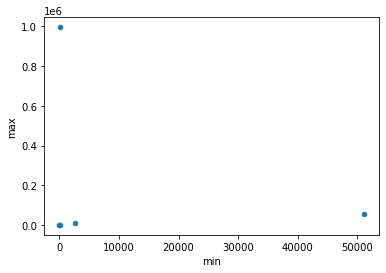

In [5]:
# Plotting data in a scatter plot

# Importing matplotlib library and the pyplot sub-library and renaming it as plt
%matplotlib inline
import matplotlib.pyplot as plt

# using example code from Python lesson to plot the min and max of the data.describe results
data.describe().T.plot(kind='scatter', x='min', y='max')

### Reviews

The customer reviews have been stored in separate files with the format

```
Customer ID: 6880
Invoice ID: INV-01352200015
Product Rating: 2/5
```

As there are several thousand of these reviews, you should aggregate them into a single data table for ease of use.  Bash or Python should be preferred; if working in SQL then use Python and the PySQL interface to produce the SQL database.

As there are a lot of these to load, I suggest that you load only a small subset, a hundred or a thousand, first, and get things working before you load the entire data set.

**Produce a short report about the aggregated review database.**

In [ ]:
# Aggregating Reviews.dat files
# Had trouble creating a nice table with columns based on the different data types
# Do we need to extract the data from each line? Not sure how to go about that
# Attempted concat, append, and merge and nothing worked
# Also wasn't sure how to "load only a small subset" so this was taxing on our computers

import glob
import pandas as pd

for filename in glob.glob('reviews/*.dat'):
    data = pd.read_csv(filename)
    print(data)

In [2]:
import pandas as pd

rev = pd.read_csv('reviews/review00001.dat', names=['values'], delimiter=':')

In [16]:
rev['values'].loc['Customer ID']

' 9192'

In [15]:
rev.loc['Customer ID'][0]

' 9192'

In [ ]:
# we can load all as dataframes and try to glue them together someone
# or load each one and convert into dictionary of series, then covert back to dataframe
# or to get all files loaded we can either match them using some kind of tool like glob, or
# we can build the name of each review

In [3]:
# glob method
from glob import glob

#gives a list of files that start with review0000 (aka it's not all of the files)
glob('reviews/review0000*.dat')

['reviews/review00008.dat',
 'reviews/review00009.dat',
 'reviews/review00007.dat',
 'reviews/review00006.dat',
 'reviews/review00004.dat',
 'reviews/review00005.dat',
 'reviews/review00001.dat',
 'reviews/review00000.dat',
 'reviews/review00002.dat',
 'reviews/review00003.dat']

In [4]:
from glob import glob

list_of_files = sorted(glob('reviews/review0000*.dat'))
list_of_files

['reviews/review00000.dat',
 'reviews/review00001.dat',
 'reviews/review00002.dat',
 'reviews/review00003.dat',
 'reviews/review00004.dat',
 'reviews/review00005.dat',
 'reviews/review00006.dat',
 'reviews/review00007.dat',
 'reviews/review00008.dat',
 'reviews/review00009.dat']

In [5]:
list_of_files = []
for i in range(0, 50000):
    list_of_files.append('reviews/review'+str(i).zfill(5)+'.dat')

In [6]:
# load each file separately then process it
custs = []
invs = []
prods = []

for review_file in list_of_files: #[0:100]:
    rev = pd.read_csv(review_file, names=['values'], delimiter=':')
    custs.append(rev['values'].loc['Customer ID'][1: ])
    invs.append(rev['values'].loc['Invoice ID'][1: ])
    prods.append(int(rev['values'].loc['Product Rating'][1:].split('/')[0]))

In [7]:
my_dict = {
    'Customer_id': custs,
    'Invoice_id' : invs,
    'Rating': prods
}

In [8]:
ratings = pd.DataFrame.from_dict(my_dict)

In [9]:
ratings.head()

,Customer_id,Invoice_id,Rating
0,2383,S11999300004,2
1,9192,S05392500012,3
2,4847,S18588700081,3
3,4288,S34002200005,1
4,1193,S10611300016,4


In [10]:
ratings.to_csv('data_code/review.csv')

### Merging the Database

Once the data have been loaded into three separate tables, which I will here call `invoices`, `items`, and `reviews`, **you should merge them into each other.**  Your two master records are the invoices, which should never change in number, and the reviews, which are similarly fixed.  The item data can be combined with those.

If using Pandas, you should use a `left` join on `invoices` with `items`.

If using SQL, you should left-join `invoices` to `items`.

This should yield a merged database, `invoices_all`, which contains the invoices as records and includes information about each item sold.

Do the same for the reviews with the item data in `reviews_all`, except that you should `left` join on `reviews` with `invoices`, as not all invoice purchases generated reviews.  You should verify that you can obtain item IDs and rating numbers from the same database, as that will be necessary for the recommendation engine step below.

_(If you need help with this step, reach out to me.  That offer stands for all of this, but this step is perhaps more complicated than some others.)_

In [2]:
import pandas as pd

invoices = pd.read_csv('data_code/invoice.csv')
items = pd.read_csv('data_code/item.csv')
reviews = pd.read_csv('data_code/review.csv', usecols = ['Customer_id','Invoice_id', 'Rating']) #isolating specific columns since there is an unnamed column in this file for some reason

invoices_all = pd.merge(invoices, items, on='Item_id', how='left')
reviews_all = pd.merge(reviews, invoices_all, on="Invoice_id", how='left')

reviews_all

,Customer_id,Invoice_id,Rating,Date,Item_id,Vendor_id,Vendor_Name,Store_id,Store_Name,Address,...,Zip_Code,County_id,County_Name,Bottles_Sold,Item_Description,Category,Pack,Bottle_Volume_ml,Bottle_Cost,Bottle_Retail_Price
0,2383,S11999300004,2,2013-05-02,89196,395,Mankanshoku Inc.,4072,Famous Durg,2604 W LOCUST ST,...,52804,82,Scott,12,Hisoka's Cola,Cola,12,750.0,2.98,4.47
1,9192,S05392500012,3,2012-05-08,58836,395,Mankanshoku Inc.,3858,Harolds Jack N Jill / Davenport,6723 NW BLVD UNIT 2,...,52806,82,Scott,12,Shinji's Lime,Lime Soda,12,750.0,2.15,3.22
2,4847,S18588700081,3,2014-04-23,73702,259,Inaba Brands,2637,Hy-Vee #5 / Davenport,2351 W LOCUST,...,52804,82,Scott,12,Alucard's Ginger Soda,Ginger Ale,12,750.0,2.62,3.93
3,4288,S34002200005,1,2016-08-18,35916,297,Katou Company,4694,Rina Mart LLC / Davenport,"3815, WEST KIMBERLY RD",...,52806,82,Scott,12,Haruko's Gourmet Black Cherry Soda,Cherry Soda,12,750.0,1.97,2.96
4,1193,S10611300016,4,2013-02-14,26821,85,Ayuzawa Corporation,4076,Sakar Durg Store,1026 W RIVER DR #B,...,52802,82,Scott,2,Killua's Watermelon Cream,Cream Soda,12,500.0,2.78,4.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4626,S16848500007,1,2014-01-15,23823,297,Katou Company,4588,Sam's Mini Mart / Sioux City,"923, W 7TH ST",...,51103,97,Woodbury,48,Anju's Watermelon Cream,Cream Soda,48,200.0,1.67,2.49
49996,4210,S17365600075,1,2014-02-12,58875,395,Mankanshoku Inc.,3757,Wal-Mart 3590 / Sioux City,3101 FLOYD BLVD,...,51108,97,Woodbury,6,Shiro's Lime,Lime Soda,6,1750.0,2.98,4.47
49997,9072,S15191300043,4,2013-10-16,33918,434,Minami LLC,3797,The Durg Store / Davenport,211 W 53RD ST,...,52806,82,Scott,1,Shougo's Red Pop,Cherry Soda,12,500.0,2.20,3.30
49998,3919,S12888100001,5,2013-06-18,27102,255,Ikari Ltd.,2625,Hy-Vee Convenience Store #2,3301 W KIMBERLY RD,...,52804,82,Scott,6,L's Watermelon Cream,Cream Soda,6,750.0,4.05,6.08


In [100]:
reviews_all.to_csv('data_code/reviews_all.csv')

## Statistical Analysis of the Invoices

Your manager wants you to take a look at the invoices and see if there's anything useful, salesworthy, or _fishy_ about them.  Now that you have a data table containing the invoices and item data, you are in a good situation to statistically analyze the values involved.

First off, **decide which fields should be examined statistically.**  Does it make sense to correlate against, say, bottle volume?  Number of items in a pack?  Price?  Justify your decisions.

Next, **carry out a basic statistical analysis looking for anomalies and outliers.**  These are loosely defined, but if you don't have a background in statistics, let's say that it's a value that lies at least four standard deviations from the mean, which means it should occur less than 6 in 100,000 times in a data set (0.006% likelihood).

This step is well-suited to Python, in particular the [`scipy.stats` module](https://docs.scipy.org/doc/scipy/reference/stats.html).  If your data tables are in SQL, load them into Python via the PySQL interface.

For instance, a Python-based $t$-test, looking at the likelihood of correlation, could be written as

## Original correlation code

In [24]:
df_cs = reviews_all[reviews_all['Category'] == 'Cream Soda']
df_rb = reviews_all[reviews_all['Category'] == 'Root Beer']

from scipy import stats
stats.ttest_ind(df_cs['Rating'],df_rb['Rating'],equal_var=False)

Ttest_indResult(statistic=0.5238119970052665, pvalue=0.6004185721213342)

## Root Beer Bottle Cost and Rating Correlation Section

In [53]:
df_rb = reviews_all[reviews_all['Category'] == 'Root Beer']

from scipy import stats
stats.ttest_ind(df_rb['Bottle_Cost'],df_rb['Rating'],equal_var=False) #testing correlation between bottle cost & rating of Root Beer category

Ttest_indResult(statistic=-5.027507424742324, pvalue=5.046990555891508e-07)

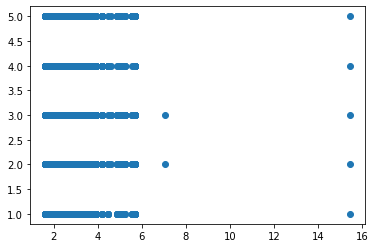

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

df_rb = reviews_all[reviews_all['Category'] == 'Root Beer']

# creating scatter plot comparing Bottle Cost data with Rating data for the Root Beer category
plt.scatter(df_rb['Bottle_Cost'], df_rb['Rating'])
plt.show()

**Report: There appears to be some outliers in this particular correlation within the Root Beer category**

## Cream Soda Bottle Cost and Rating Correlation Section

In [49]:
df_cs = reviews_all[reviews_all['Category'] == 'Cream Soda']

from scipy import stats
stats.ttest_ind(df_cs['Bottle_Cost'],df_cs['Rating'],equal_var=False) #testing correlation between bottle cost & rating of Cream Soda category

Ttest_indResult(statistic=3.4769165469781464, pvalue=0.0005081421915541813)

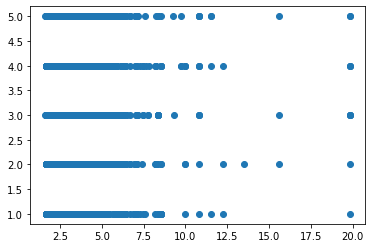

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

df_cs = reviews_all[reviews_all['Category'] == 'Cream Soda']

# creating scatter plot comparing Bottle Cost data with Rating data for the Cream Soda category
plt.scatter(df_cs['Bottle_Cost'], df_cs['Rating'])
plt.show()

**Report: There appears to be some outlier information in this particular correlation within the Cream Sode category**

In the result, the `pvalue` parameter is lower than $p=0.05$ if there is statistically significant correlation, greater than 0.05 otherwise.

Besides a quick look at correlations across categories, you should look at the statistical range and any outliers.  For instance, to check for outliers in items sold, we can get the standard deviation and look for records beyond our threshold:

In [56]:
avg = invoices_all['Bottles_Sold'].mean()
stdev = invoices_all['Bottles_Sold'].std()
invoices_all[invoices_all['Bottles_Sold'] > avg+4*stdev]

,Invoice_id,Date,Item_id,Vendor_id,Vendor_Name,Store_id,Store_Name,Address,City_Name,Zip_Code,County_id,County_Name,Bottles_Sold,Item_Description,Category,Pack,Bottle_Volume_ml,Bottle_Cost,Bottle_Retail_Price
3292,INV-00179900001,2016-09-07,34368,370,Kyon Inc.,2614,Hy-Vee #3 Food and Drugstore,1823 E KIMBERLY RD,DAVENPORT,52807,82,Scott,100,Ruby's Black Cherry,Cherry Soda,6,1750.0,2.91,4.37
5467,INV-00192900006,2016-09-08,11788,115,Deviluke Inc.,4196,Fareway Stores #987 / Davenport,1635 WEST 53RD ST,DAVENPORT,52806,82,Scott,100,Meliodas's Old Fashioned Cream Soda,Cream Soda,6,1750.0,2.87,4.41
15765,INV-00741300073,2016-10-05,37347,380,Le Company,2625,Hy-Vee Convenience Store #2,3301 W KIMBERLY RD,DAVENPORT,52804,82,Scott,100,Howl's Gourmet Black Cherry Soda,Cherry Soda,12,1000.0,2.10,3.15
24376,INV-01082500004,2016-10-20,11296,260,Inuyasha Brands,2635,Hy-Vee #4 / Davenport,4064 E 53RD ST,DAVENPORT,52807,82,Scott,275,Mayoi's Old Fashioned Cream Soda,Cream Soda,12,750.0,3.51,5.26
24391,INV-01082500019,2016-10-20,64868,421,Midoriya Inc.,2635,Hy-Vee #4 / Davenport,4064 E 53RD ST,DAVENPORT,52807,82,Scott,100,Sakura's Root Beer,Root Beer,6,1750.0,3.66,5.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929517,S34103000066,2016-08-24,89577,55,Arlert Company,2625,Hy-Vee Convenience Store #2,3301 W KIMBERLY RD,DAVENPORT,52804,82,Scott,120,Itachi's Cola,Cola,12,1000.0,2.49,3.74
929531,S34103000080,2016-08-24,10808,260,Inuyasha Brands,2625,Hy-Vee Convenience Store #2,3301 W KIMBERLY RD,DAVENPORT,52804,82,Scott,360,Mako's Cream Soda,Cream Soda,12,1000.0,4.11,6.17
929550,S34103000099,2016-08-24,43337,260,Inuyasha Brands,2625,Hy-Vee Convenience Store #2,3301 W KIMBERLY RD,DAVENPORT,52804,82,Scott,120,Langley's Energy,Energy Drink,12,1000.0,3.16,4.74
930191,S34113900073,2016-08-25,64870,421,Midoriya Inc.,2635,Hy-Vee #4 / Davenport,4064 E 53RD ST,DAVENPORT,52807,82,Scott,192,Saitama's Craft Root Beer,Root Beer,48,100.0,1.63,2.45


You should plot and observe if there are any clusters as well and what those may imply for the business perspective.

Similarly, you should consider the review ratings and any correlations with particular products, product categories, or other features.

**Report on your findings:  any statistically significant correlations in ratings, in sales, etc., as well as any outliers in the data which seem suspicious to you and why.**  I don't presuppose anything about what may or may not be in these data.  If no one on your team knows much about statistics, then rely more on expanding the basic analyses I've sketched above.

### Team 1 Report

We were able to run some basic statistical tests on other pieces of data but we aren't sure if either of them are of any significance. No one on the team has a strong stats experience. There appeared to be outliers in each of our plots but we are not knowledgeable enough to know how to navigate around those.

## A Recommendation Engine

Your business manager has suggested using the review ratings as a resource for a recommendation engine.  A recommendation engine takes a product and searches for things those who rated this product highly also liked.

A colleague of yours produced a recommendation engine using the principles outlined in the Data Analytics section of this program.  **You should prepare the data to plug into the recommendation engine, run some examples, and produce a report on the behavior and suitability.**

### `holden`

The essence of a recommendation engine is that it take a particular exemplar and produce a short list of similar suggestions.  This may be done on one of several bases:

1. Raw popularity.  Simply return similarly-rated items.  This is coarse but trivial.
2. Content similarity.  Requires extensive metadata tagging.  Combines 
3. Collaborative filtering.  Based on who rates a product highly and what else they rate highly.  (This is our approach.)

    We have customer rating data tied to invoices, and invoice data tied to soft drink data, so we are able to produce a recommendation engine which operates on the appropriate columns.

The recommendation engine `holden` is written in Python and accepts fields of data to compare.  These may be NumPy arrays, Pandas Series (columns from dataframes), or extracted from SQL via PySQL.

I have tried to make `holden` fairly robust, but it requires a few columns:  `'Customer_id'`, `'Rating'`, `'Item_id'`, and `'Item_Description'`.

In [17]:
# Checked all_df output to see if dataset was actually populated; it is so the issue must be with holden itself
import holden
import pandas as pd

all_df = pd.DataFrame(reviews_all, columns=['Customer_id', 'Rating', 'Item_id', 'Item_Description'])

all_df

,Customer_id,Rating,Item_id,Item_Description
0,2383,2,89196,Hisoka's Cola
1,9192,3,58836,Shinji's Lime
2,4847,3,73702,Alucard's Ginger Soda
3,4288,1,35916,Haruko's Gourmet Black Cherry Soda
4,1193,4,26821,Killua's Watermelon Cream
...,...,...,...,...
49995,4626,1,23823,Anju's Watermelon Cream
49996,4210,1,58875,Shiro's Lime
49997,9072,4,33918,Shougo's Red Pop
49998,3919,5,27102,L's Watermelon Cream


In [126]:
import holden
import pandas as pd
import numpy as np
import matplotlib.pyplot as py

all_df = pd.DataFrame(reviews_all, columns=['Customer_id', 'Rating', 'Item_id', 'Item_Description']) #tried attaching iloc method in this line

rec = holden.holden()
rec.initialize(all_df[:-1]) #trying to pinpoint indexing in attempt to prevent it from going "out-of-bounds"

In [111]:
#checkig the length of the object being indexed
len(all_df)

50000

In [127]:
rec.match("Seira's Black Cherry")

IndexError: single positional indexer is out-of-bounds

### Team 1 Report:
We tried to look up solution to this error. We understand that it has something to do with how holden is indexing through our dataset but it might be going beyond the available indices within the table. We're not sure how to troubleshoot this but tried a variety of methods including iloc, loc, basic indexing in various locations within our code. The indexing method that we left in our code for submission is one that didn't generate an error and was the simplest iteration of our indexing-based solution to the "IndexError."